# Project 2 - Randomized Optimization

In [ ]:
# Anaconda wasn't playing nicely with pip, so I had to find this workaround to install mlrose:
import sys
!{sys.executable} -m pip install mlrose
# https://mlrose.readthedocs.io/en/stable/source/tutorial3.html

In [111]:
import numpy as np
import pandas as pd
import mlrose

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import random

from time import time as time
from math import inf as inf

data = pd.read_csv('kingRookKingPawn.csv')
np.random.seed(2019)

In [13]:
instancesKK = data.drop(labels='canWin?', axis='columns', inplace=False)
labelsKK = data.iloc[:,-1]

# The King-Pawn vs. King-Rook dataset actually has a unique challenge. The data is in form of t/f and other character values.
# As sklearn's library doesn't work well (or at all) will non-integer values, we have to use pandas.get_dummies() to one-hot
# encode our character values into integers.
print("Number of Attribute Columns: " + str(instancesKK.shape[1]))
instancesKK = pd.get_dummies(instancesKK)
print("Number of Attribute Columns: " + str(instancesKK.shape[1]))

test_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(instancesKK, labelsKK, random_state=2019, test_size=.3)

Number of Attribute Columns: 36
Number of Attribute Columns: 73


In [5]:
def plot_xys(xs, ys, lbls, title, xlab, ylab):
    print('Producing graph...')

    plt.grid()
    plt.title(title)
    
    colors = ['b', 'r', 'g', 'm', 'k', 'c', 'y']

    for i in range(len(xs)):
        plt.plot(xs[i], ys[i], colors[i % len(colors)] + ',-', label=lbls[i])

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend()
    plt.show()

In [95]:
# Defining Baseline
t0 = time()
nn = MLPClassifier(hidden_layer_sizes=20, random_state=2019)
nn.fit(x_train, y_train)
t1 = time()

predictions = nn.predict(x_train)
t2 = time()
print("Accuracy of Neural Network (Training Data): " + str(accuracy_score(y_train, predictions)))
predictions = nn.predict(x_test)
t3 = time()
print("Accuracy of Neural Network (Testing Data): " + str(accuracy_score(y_test, predictions)))
print("Time to Train: " + str(t1-t0) + "s. Times to Test: " + str(t2-t1) + " and " + str(t3-t2) + " seconds.")

Accuracy of Neural Network (Training Data): 0.9955297273133661
Accuracy of Neural Network (Testing Data): 0.9833159541188738
Time to Train: 1.4991416931152344s. Times to Test: 0.0019989013671875 and 0.0019958019256591797 seconds.


C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Part 1
### Random Hill Climbing

In [97]:
# Baseline 
scores = []
times = []


rhcMA = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu', algorithm = 'random_hill_climb',)
t0 = time()
rhcMA.fit(x_train, y_train)
diff = time() - t0

times.append(diff)

y_test_pred = rhcMA.predict(x_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)

scores.append(y_test_accuracy)

print('Scores', scores)
print('Times', times)

Scores [0.5307612095933264]
Times [0.9004826545715332]


Attempt: 10
0.49113660062565173
Attempt: 20
0.5954118873826904
Attempt: 30
0.7361835245046924
Attempt: 40
0.5922836287799792
Attempt: 50
0.6412930135557873
Attempts [10, 20, 30, 40, 50]
Scores [0.49113660062565173, 0.5954118873826904, 0.7361835245046924, 0.5922836287799792, 0.6412930135557873]
Times [1.184311866760254, 9.079787969589233, 6.671173095703125, 5.478855609893799, 6.408323764801025]
Producing graph...


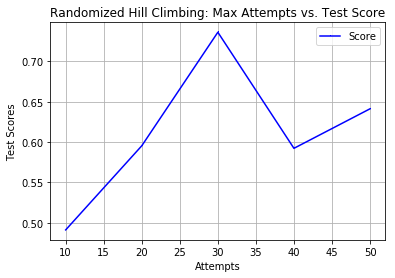

Producing graph...


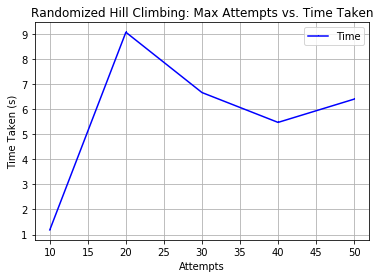

In [85]:
# Maximum Attempts. We used 20 nodes because a higher number of nodes didn't seem to 

attempts = list(range(10, 51, 10))
scores = []
times = []

for i in attempts:
    print('Attempt:', i)
    rhcMA = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu', \
                                     algorithm = 'random_hill_climb',  max_attempts=i, \
                                     bias = True, is_classifier = True, learning_rate = 0.2, \
                                     early_stopping = True, clip_max = 5, max_iters=1000)
    t0 = time()
    rhcMA.fit(x_train, y_train)
    diff = time() - t0

    times.append(diff)

    y_test_pred = rhcMA.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)

    print(y_test_accuracy)
    scores.append(y_test_accuracy)

print('Attempts', attempts)
print('Scores', scores)
print('Times', times)

plot_xys([attempts], [scores], ['Score'],
    'Randomized Hill Climbing: Max Attempts vs. Test Score',
    'Attempts', 'Test Scores')

plot_xys([attempts], [times], ['Time'],
    'Randomized Hill Climbing: Max Attempts vs. Time Taken',
    'Attempts', 'Time Taken (s)')

Restart: 0
0.5537017726798749
Restart: 1
0.6392075078206465
Restart: 2
0.7069864442127216
Restart: 3
0.5745568300312826
Restart: 4
0.694473409801877
Restart: 5
0.7247132429614181
Restart: 6
0.721584984358707
Restart: 7
0.6642335766423357
Restart: 8
0.7184567257559958
Restart: 9
0.7601668404588112
Restarts [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Scores [0.5537017726798749, 0.6392075078206465, 0.7069864442127216, 0.5745568300312826, 0.694473409801877, 0.7247132429614181, 0.721584984358707, 0.6642335766423357, 0.7184567257559958, 0.7601668404588112]
Times [5.231718301773071, 10.768800497055054, 13.555221796035767, 15.706985473632812, 12.50881814956665, 18.78521704673767, 30.129707098007202, 25.54733681678772, 35.29575824737549, 26.398836374282837]
Producing graph...


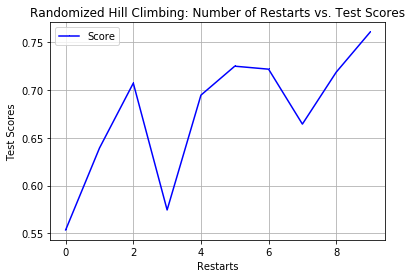

Producing graph...


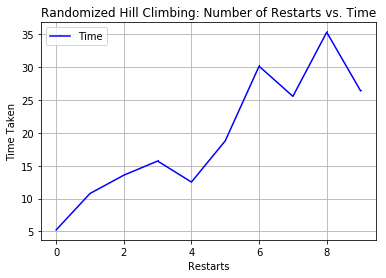

In [29]:
# Num Restarts

restarts = list(range(0, 10))
scores = []
times = []

for i in restarts:
    print('Restart:', i)

    t0 = time()

    accs = []
    for j in range(0, i + 1):
        rhcR = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu',
                                         algorithm = 'random_hill_climb', max_attempts=10,
                                         bias = True, is_classifier = True, learning_rate = 0.2,
                                         early_stopping = True, clip_max = 5, max_iters=1000)
        rhcR.fit(x_train, y_train)

        y_test_pred = rhcR.predict(x_test)
        y_test_accuracy = accuracy_score(y_test, y_test_pred)
        accs.append(y_test_accuracy)

    diff = time() - t0
    times.append(diff)
    print(max(accs))
    scores.append(max(accs))
    

print('Restarts', restarts)
print('Scores', scores)
print('Times', times)

plot_xys([restarts], [scores], ['Score'],
    'Randomized Hill Climbing: Number of Restarts vs. Test Scores',
    'Restarts', 'Test Scores')

plot_xys([restarts], [times], ['Time'],
    'Randomized Hill Climbing: Number of Restarts vs. Time',
    'Restarts', 'Time Taken (s)')

# Change the number of iterations and max attempts and see what happens? Graph based those?

Learning Rate:  0.2
0.5484880083420229
Learning Rate:  0.4
0.6058394160583942
Learning Rate:  0.6
0.5380604796663191
Learning Rate:  0.8
0.5464025026068822
Learning Rate:  1.0
0.6642335766423357
Learning Rate:  1.2
0.6715328467153284
Learning Rate:  1.4
0.670490093847758
Learning Rates [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
Scores [0.5484880083420229, 0.6058394160583942, 0.5380604796663191, 0.5464025026068822, 0.6642335766423357, 0.6715328467153284, 0.670490093847758]
Times [1.968886137008667, 2.891324281692505, 3.243138313293457, 1.2083067893981934, 1.222299337387085, 2.254704236984253, 1.321242094039917]
Producing graph...


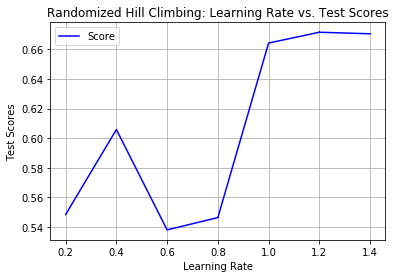

Producing graph...


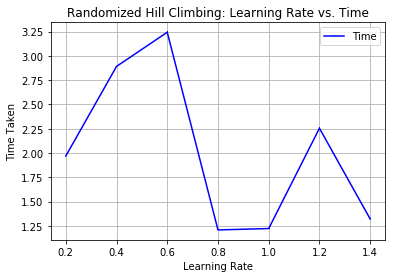

In [37]:
# Change in Learning Rate

learningRates = [.2, .4, .6, .8, 1.0, 1.2, 1.4]
scores = []
times = []

for i in learningRates:
    print('Learning Rate: ', i)

    t0 = time()

    rhcLR = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu',
                                   algorithm = 'random_hill_climb', max_attempts=10,
                                   bias = True, is_classifier = True, learning_rate = i,
                                   early_stopping = True, clip_max = 5, max_iters=1000)
    rhcLR.fit(x_train, y_train)

    y_test_pred = rhcLR.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    scores.append(y_test_accuracy)
    print(y_test_accuracy)

    diff = time() - t0
    times.append(diff)
    

print('Learning Rates', learningRates)
print('Scores', scores)
print('Times', times)

plot_xys([learningRates], [scores], ['Score'],
    'Randomized Hill Climbing: Learning Rate vs. Test Scores',
    'Learning Rate', 'Test Scores')

plot_xys([learningRates], [times], ['Time'],
    'Randomized Hill Climbing: Learning Rate vs. Time',
    'Learning Rate', 'Time Taken (s)')

Iterations:  250
0.5922836287799792
Iterations:  500
0.5307612095933264
Iterations:  750
0.5828988529718456
Iterations:  1000
0.59436913451512
Iterations:  1250
0.7320125130344108
Iterations:  1500
0.6444212721584984
Iterations:  1750
0.7382690302398331
Iterations range(250, 2000, 250)
Scores [0.5922836287799792, 0.5307612095933264, 0.5828988529718456, 0.59436913451512, 0.7320125130344108, 0.6444212721584984, 0.7382690302398331]
Times [0.35379672050476074, 1.110360860824585, 1.4561638832092285, 0.14491987228393555, 0.9004833698272705, 0.8954827785491943, 0.6416342258453369]
Producing graph...


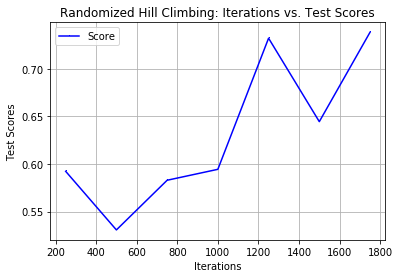

Producing graph...


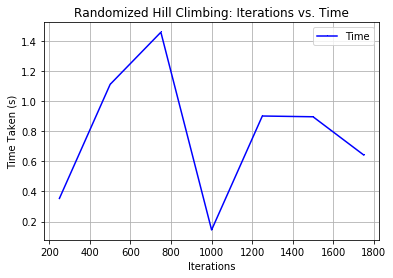

In [98]:
# Change in iterations

iterations = range(250, 2000, 250)
scores = []
times = []

for i in iterations:
    print('Iterations: ', i)

    t0 = time()

    rhcI = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu',
                                   algorithm = 'random_hill_climb', max_attempts=10,
                                   bias = True, is_classifier = True, learning_rate = 2,
                                   early_stopping = True, clip_max = 5, max_iters=i)
    rhcI.fit(x_train, y_train)

    y_test_pred = rhcI.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    scores.append(y_test_accuracy)
    print(y_test_accuracy)

    diff = time() - t0
    times.append(diff)
    

print('Iterations', iterations)
print('Scores', scores)
print('Times', times)

plot_xys([iterations], [scores], ['Score'],
    'Randomized Hill Climbing: Iterations vs. Test Scores',
    'Iterations', 'Test Scores')

plot_xys([iterations], [times], ['Time'],
    'Randomized Hill Climbing: Iterations vs. Time',
    'Iterations', 'Time Taken (s)')

### Simulated Annealing

In [99]:
#Baseline

scores = []
times = []

saMA = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu', \
                                     algorithm = 'simulated_annealing',  max_attempts=10, \
                                     bias = True, is_classifier = True, learning_rate = 0.4, \
                                     early_stopping = True, clip_max = 5, max_iters=1000)
t0 = time()
saMA.fit(x_train, y_train)
diff = time() - t0
times.append(diff)

y_test_pred = saMA.predict(x_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)  
scores.append(y_test_accuracy)

print('Scores', scores)
print('Times', times)


Attempt: 1750
Scores [0.5067778936392076]
Times [7.588624477386475]


Attempt: 1
0.42857142857142855
Attempt: 3
0.48905109489051096
Attempt: 5
0.7278415015641293
Attempt: 7
0.708029197080292
Attempt: 9
0.6360792492179353
Attempt: 11
0.6475495307612096
Attempt: 13
0.5954118873826904
Attempt: 15
0.6788321167883211
Attempt: 17
0.6673618352450469
Attempt: 19
0.7122002085505735
Attempts [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
Scores [0.42857142857142855, 0.48905109489051096, 0.7278415015641293, 0.708029197080292, 0.6360792492179353, 0.6475495307612096, 0.5954118873826904, 0.6788321167883211, 0.6673618352450469, 0.7122002085505735]
Times [0.42075586318969727, 4.282541751861572, 5.81466269493103, 7.100928544998169, 6.251409530639648, 6.568227291107178, 6.977994918823242, 8.70100998878479, 6.784102439880371, 6.666257619857788]
Producing graph...


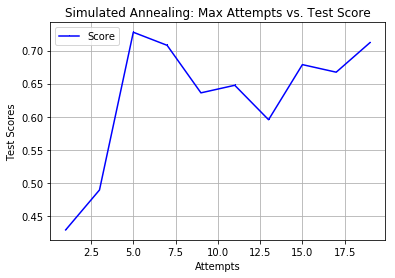

Producing graph...


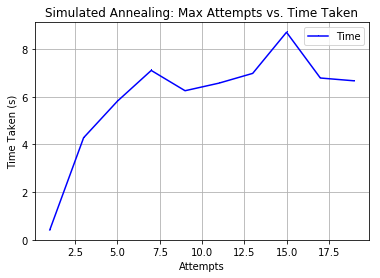

In [44]:
# Maximum Attempts (Number of times it randomly selects points in the neighborhood before deciding to jump)

attempts = list(range(1, 21, 2))
scores = []
times = []

for i in attempts:
    print('Attempt:', i)
    saMA = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu', \
                                     algorithm = 'simulated_annealing',  max_attempts=i, \
                                     bias = True, is_classifier = True, learning_rate = 0.4, \
                                     early_stopping = True, clip_max = 5, max_iters=1000)
    t0 = time()
    saMA.fit(x_train, y_train)
    diff = time() - t0

    times.append(diff)

    y_test_pred = saMA.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)

    print(y_test_accuracy)
    scores.append(y_test_accuracy)

print('Attempts', attempts)
print('Scores', scores)
print('Times', times)

plot_xys([attempts], [scores], ['Score'],
    'Simulated Annealing: Max Attempts vs. Test Score',
    'Attempts', 'Test Scores')

plot_xys([attempts], [times], ['Time'],
    'Simulated Annealing: Max Attempts vs. Time Taken',
    'Attempts', 'Time Taken (s)')

Initial Temperature: 0.4
0.6976016684045881
Initial Temperature: 0.8
0.46715328467153283
Initial Temperature: 1.2
0.5828988529718456
Initial Temperature: 1.6
0.5370177267987487
Initial Temperature: 2.0
0.5015641293013556
Initial Temperature: 2.4
0.4181438998957247
Initial Temperature: 2.8
0.5130344108446299
Initial Temperature: 3.2
0.5182481751824818
Initial Temperature: 3.6
0.38894681960375393
Initial Temperature: 4.0
0.5547445255474452
Initial Temperatures [0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0]
Scores [0.6976016684045881, 0.46715328467153283, 0.5828988529718456, 0.5370177267987487, 0.5015641293013556, 0.4181438998957247, 0.5130344108446299, 0.5182481751824818, 0.38894681960375393, 0.5547445255474452]
Times [7.20386266708374, 7.392756700515747, 10.40602731704712, 8.99483847618103, 8.348212003707886, 7.144895076751709, 8.270253896713257, 7.81451416015625, 8.658031702041626, 7.908460855484009]
Producing graph...


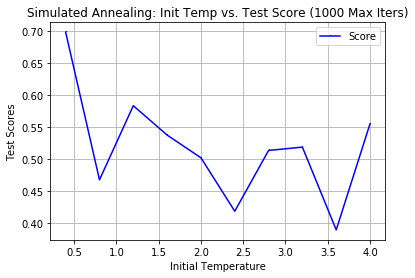

Producing graph...


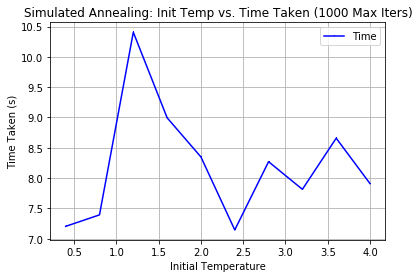

In [69]:
# Initial Temperature for 1000 max iterations (1000 jumps)

initTemp =[0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0]
scores = []
times = []

for i in initTemp:
    print('Initial Temperature:', i)
    saIT = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu',
                                     algorithm = 'simulated_annealing',  max_attempts=14,
                                     bias = True, is_classifier = True, learning_rate = .2,
                                     early_stopping = True, clip_max = 5, max_iters=1000,
                                     schedule = mlrose.ExpDecay(init_temp = i, exp_const = .005))
    t0 = time()
    saIT.fit(x_train, y_train)
    diff = time() - t0

    times.append(diff)

    y_test_pred = saIT.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)

    print(y_test_accuracy)
    scores.append(y_test_accuracy)

print('Initial Temperatures', initTemp)
print('Scores', scores)
print('Times', times)

plot_xys([initTemp], [scores], ['Score'],
    'Simulated Annealing: Init Temp vs. Test Score (1000 Max Iters)',
    'Initial Temperature', 'Test Scores')

plot_xys([initTemp], [times], ['Time'],
    'Simulated Annealing: Init Temp vs. Time Taken (1000 Max Iters)',
    'Initial Temperature', 'Time Taken (s)')

Cooling Rate: 0.005
0.5391032325338895
Cooling Rate: 0.015
0.6339937434827946
Cooling Rate: 0.015
0.556830031282586
Cooling Rate: 0.025
0.5537017726798749
Cooling Rate: 0.035
0.5453597497393118
Cooling Rate: 0.045
0.6913451511991658
Cooling Rate: 0.055
0.6266944734098019
Cooling Rate: 0.065
0.6100104275286757
Cooling Rate: 0.075
0.6308654848800834
Cooling Rate: 0.085
0.6204379562043796
Cooling Rate: 0.1
0.6798748696558915
Cooling Rate [0.005, 0.015, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.1]
Scores [0.5391032325338895, 0.6339937434827946, 0.556830031282586, 0.5537017726798749, 0.5453597497393118, 0.6913451511991658, 0.6266944734098019, 0.6100104275286757, 0.6308654848800834, 0.6204379562043796, 0.6798748696558915]
Times [7.035962104797363, 6.740135431289673, 6.829076290130615, 6.166460990905762, 7.088931560516357, 6.791101694107056, 7.300813436508179, 6.6821794509887695, 8.972849369049072, 7.951436519622803, 8.650036573410034]
Producing graph...


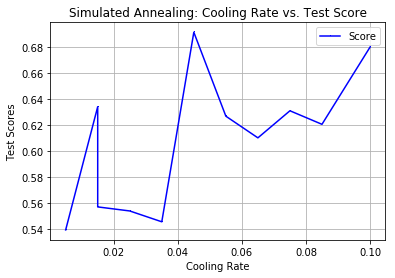

Producing graph...


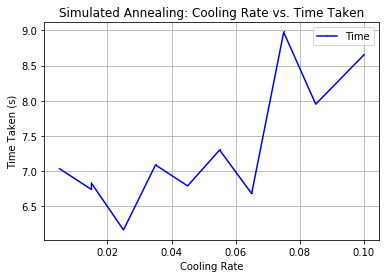

In [71]:
# Cooling Rate for 1000 max iterations (1000 jumps)

coolingRate = [.005, .015, .015, .025, .035, .045, .055, .065, .075, .085, .1]
scores = []
times = []

for i in coolingRate:
    print('Cooling Rate:', i)
    saCR = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu',
                                     algorithm = 'simulated_annealing',  max_attempts=14,
                                     bias = True, is_classifier = True, learning_rate = .2,
                                     early_stopping = True, clip_max = 5, max_iters=1000,
                                     schedule = mlrose.ExpDecay(init_temp = 1, exp_const = i))
    t0 = time()
    saCR.fit(x_train, y_train)
    diff = time() - t0

    times.append(diff)

    y_test_pred = saCR.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)

    print(y_test_accuracy)
    scores.append(y_test_accuracy)

print('Cooling Rate', coolingRate)
print('Scores', scores)
print('Times', times)

plot_xys([coolingRate], [scores], ['Score'],
    'Simulated Annealing: Cooling Rate vs. Test Score',
    'Cooling Rate', 'Test Scores')

plot_xys([coolingRate], [times], ['Time'],
    'Simulated Annealing: Cooling Rate vs. Time Taken',
    'Cooling Rate', 'Time Taken (s)')

Iterations:  250
0.5557872784150156
Iterations:  500
0.6923879040667362
Iterations:  750
0.8331595411887383
Iterations:  1000
0.862356621480709
Iterations:  1250
0.8467153284671532
Iterations:  1500
0.8915537017726799
Iterations:  1750
0.8821689259645464
Iterations range(250, 2000, 250)
Scores [0.5557872784150156, 0.6923879040667362, 0.8331595411887383, 0.862356621480709, 0.8467153284671532, 0.8915537017726799, 0.8821689259645464]
Times [2.7154412269592285, 5.388909578323364, 4.8454296588897705, 6.180469989776611, 6.772113800048828, 10.145198583602905, 10.582387924194336]
Producing graph...


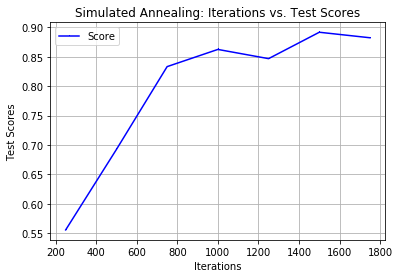

Producing graph...


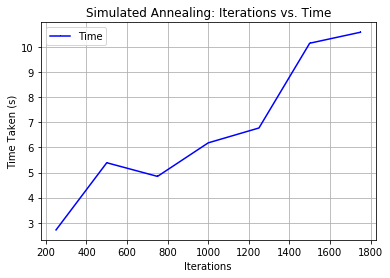

In [103]:
# Change in iterations

iterations = range(250, 2000, 250)
scores = []
times = []

for i in iterations:
    print('Iterations: ', i)

    t0 = time()

    rhcI = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu',
                                   algorithm = 'simulated_annealing', max_attempts=10,
                                   bias = True, is_classifier = True, learning_rate = 2,
                                   early_stopping = True, clip_max = 5, max_iters=i)
    rhcI.fit(x_train, y_train)

    y_test_pred = rhcI.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    scores.append(y_test_accuracy)
    print(y_test_accuracy)

    diff = time() - t0
    times.append(diff)
    

print('Iterations', iterations)
print('Scores', scores)
print('Times', times)

plot_xys([iterations], [scores], ['Score'],
    'Simulated Annealing: Iterations vs. Test Scores',
    'Iterations', 'Test Scores')

plot_xys([iterations], [times], ['Time'],
    'Simulated Annealing: Iterations vs. Time',
    'Iterations', 'Time Taken (s)')

### Genetic Algorithms

In [101]:
#Baseline

scores = []
times = []

saMA = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu', \
                                     algorithm = 'genetic_alg',  max_attempts=10, \
                                     bias = True, is_classifier = True, learning_rate = 0.5, \
                                     early_stopping = True, clip_max = 5, max_iters=1000)
t0 = time()
saMA.fit(x_train, y_train)
diff = time() - t0
times.append(diff)

y_test_pred = saMA.predict(x_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)  
scores.append(y_test_accuracy)

print('Scores', scores)
print('Times', times)


Scores [0.6934306569343066]
Times [21.27377676963806]


Population: 50
0.7101147028154328
Population: 100
0.6746611053180396
Population: 150
0.6767466110531803
Population: 200
0.6934306569343066
Population: 250
0.735140771637122
Population: 300
0.7069864442127216
Population: 350
0.7090719499478624
Population: 400
0.7153284671532847
Population [50, 100, 150, 200, 250, 300, 350, 400]
Scores [0.7101147028154328, 0.6746611053180396, 0.6767466110531803, 0.6934306569343066, 0.735140771637122, 0.7069864442127216, 0.7090719499478624, 0.7153284671532847]
Times [6.343355655670166, 9.554518222808838, 19.525790452957153, 60.472291231155396, 27.513208866119385, 50.784852027893066, 95.93093991279602, 107.74615931510925]
Producing graph...


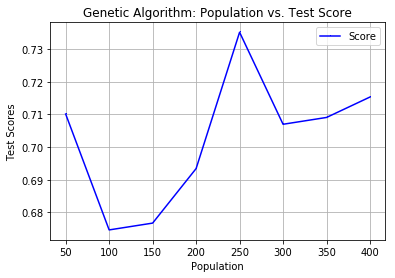

Producing graph...


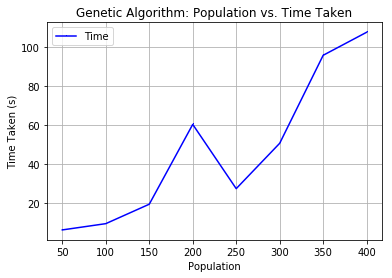

In [74]:
# Population

populations = [50, 100, 150, 200, 250, 300, 350, 400]
scores = []
times = []

for i in populations:
    print('Population:', i)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu',
                                     algorithm = 'genetic_alg',  max_attempts=14,
                                     bias = True, is_classifier = True, pop_size = i,
                                     mutation_prob=0.2, learning_rate=0.5,
                                     early_stopping = True, clip_max = 10, max_iters=2000)
    t0 = time()
    nn_model1.fit(x_train, y_train)
    diff = time() - t0

    times.append(diff)

    y_test_pred = nn_model1.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)

    print(y_test_accuracy)
    scores.append(y_test_accuracy)

print('Population', populations)
print('Scores', scores)
print('Times', times)

plot_xys([populations], [scores], ['Score'],
    'Genetic Algorithm: Population vs. Test Score',
    'Population', 'Test Scores')

plot_xys([populations], [times], ['Time'],
    'Genetic Algorithm: Population vs. Time Taken',
    'Population', 'Time Taken (s)')

Mutation Rate: 0.1
0.7101147028154328
Mutation Rate: 0.2
0.6923879040667362
Mutation Rate: 0.3
0.6965589155370178
Mutation Rate: 0.4
0.7122002085505735
Mutation Rate: 0.5
0.6475495307612096
Mutation Rate: 0.6
0.7205422314911366
Mutation Rate: 0.7
0.708029197080292
Mutation Rate: 0.8
0.7299270072992701
Mutation Rate: 0.9
0.735140771637122
Mutation Rate: 1.0
0.7174139728884255
Mutation Rate [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Scores [0.7101147028154328, 0.6923879040667362, 0.6965589155370178, 0.7122002085505735, 0.6475495307612096, 0.7205422314911366, 0.708029197080292, 0.7299270072992701, 0.735140771637122, 0.7174139728884255]
Times [37.185689210891724, 43.72790241241455, 55.497151136398315, 28.475781679153442, 34.138447761535645, 49.63951063156128, 35.594687938690186, 76.37321090698242, 42.022881269454956, 63.59452033042908]
Producing graph...


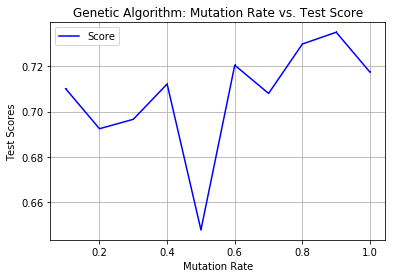

Producing graph...


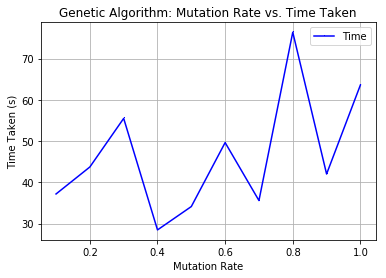

In [102]:
# Mutations. Learning rate affects the weight change when mutation occurs.

mutationRate = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
scores = []
times = []

for i in mutationRate:
    print('Mutation Rate:', i)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu',
                                     algorithm = 'genetic_alg',  max_attempts=14,
                                     bias = True, is_classifier = True, pop_size = 250,
                                     mutation_prob=i, learning_rate=0.5,
                                     early_stopping = True, clip_max = 10, max_iters=2000)
    t0 = time()
    nn_model1.fit(x_train, y_train)
    diff = time() - t0

    times.append(diff)

    y_test_pred = nn_model1.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)

    print(y_test_accuracy)
    scores.append(y_test_accuracy)

print('Mutation Rate', mutationRate)
print('Scores', scores)
print('Times', times)

plot_xys([mutationRate], [scores], ['Score'],
    'Genetic Algorithm: Mutation Rate vs. Test Score',
    'Mutation Rate', 'Test Scores')

plot_xys([mutationRate], [times], ['Time'],
    'Genetic Algorithm: Mutation Rate vs. Time Taken',
    'Mutation Rate', 'Time Taken (s)')

Generation: 1000
0.6798748696558915
Generation: 2000
0.721584984358707
Generation: 3000
0.7028154327424401
Generation: 4000
0.7434827945776851
Generation: 5000
0.6913451511991658
Generation [1000, 2000, 3000, 4000, 5000]
Scores [0.6798748696558915, 0.721584984358707, 0.7028154327424401, 0.7434827945776851, 0.6913451511991658]
Times [32.63027310371399, 29.25920605659485, 29.565032243728638, 31.001203536987305, 48.42120933532715]
Producing graph...


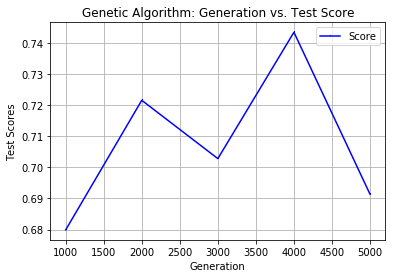

Producing graph...


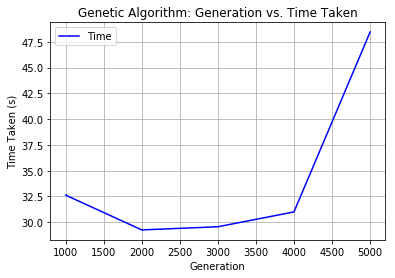

In [77]:
# Generation

generation = [1000, 2000, 3000, 4000, 5000]
scores = []
times = []

for i in generation:
    print('Generation:', i)
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20], activation = 'relu',
                                     algorithm = 'genetic_alg',  max_attempts=14,
                                     bias = True, is_classifier = True, pop_size = 250,
                                     mutation_prob=.1, learning_rate=0.5,
                                     early_stopping = True, clip_max = 10, max_iters=i)
    t0 = time()
    nn_model1.fit(x_train, y_train)
    diff = time() - t0

    times.append(diff)

    y_test_pred = nn_model1.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)

    print(y_test_accuracy)
    scores.append(y_test_accuracy)

print('Generation', generation)
print('Scores', scores)
print('Times', times)

plot_xys([generation], [scores], ['Score'],
    'Genetic Algorithm: Generation vs. Test Score',
    'Generation', 'Test Scores')

plot_xys([generation], [times], ['Time'],
    'Genetic Algorithm: Generation vs. Time Taken',
    'Generation', 'Time Taken (s)')

## Part 2

## N-Queens Problem

Queens:
n: 10
n: 20
n: 30
n: 40
n: 50
n: 60
n: 70
n: 80
n: 90
n: 100
Producing graph...


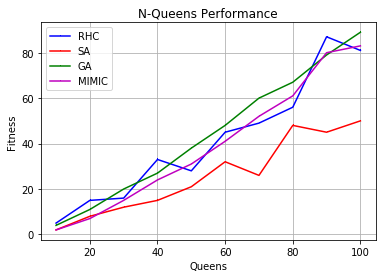

Producing graph...


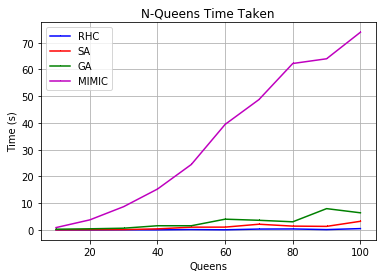

In [118]:
print('Queens:')

fit = mlrose.Queens()

qs = list(range(10, 101, 10))

rhc_s = []
sa_s = []
ga_s = []
mmc_s = []

rhc_t = []
sa_t = []
ga_t = []
mmc_t = []

for s in qs:
    print('n:', s)
    pq = mlrose.DiscreteOpt(length = s,
    fitness_fn = fit, maximize = False, max_val = s)

    t0 = time()
    bs_rh, bf_rh = mlrose.random_hill_climb(pq,max_attempts=10, max_iters=1500)
    diff = time() - t0
    rhc_s.append(bf_rh)
    rhc_t.append(diff)

    t0 = time()
    bs_sa, bf_sa = mlrose.simulated_annealing(pq,schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001),
            max_attempts = 10, max_iters = 1000)
    diff = time() - t0
    sa_s.append(bf_sa)
    sa_t.append(diff)


    t0 = time()
    bs_ga, bf_ga = mlrose.genetic_alg(pq, mutation_prob=0.1,
            pop_size = 50, max_attempts = 10, max_iters = 1000)
    diff = time() - t0
    ga_s.append(bf_ga)
    ga_t.append(diff)

    t0 = time()
    bs_mm, bf_mm = mlrose.mimic(pq, pop_size=200, keep_pct=0.2,
            max_attempts=10, max_iters=inf)
    diff = time() - t0
    mmc_s.append(bf_mm)
    mmc_t.append(diff)

plot_xys([qs for i in range(4)],
            [rhc_s, sa_s, ga_s, mmc_s],
            ['RHC', 'SA', 'GA', 'MIMIC'],
            'N-Queens Performance',
            'Queens', 'Fitness')

plot_xys([qs for i in range(4)],
            [rhc_t, sa_t, ga_t, mmc_t],
            ['RHC', 'SA', 'GA', 'MIMIC'],
            'N-Queens Time Taken',
            'Queens', 'Time (s)')

Producing graph...


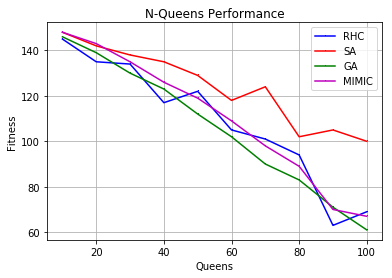

Producing graph...


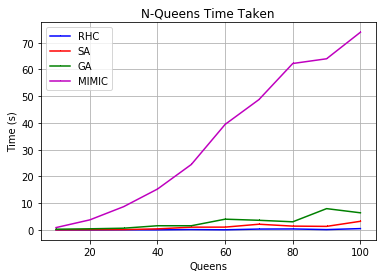

In [119]:
# We need to change the fitness values for N Queens because it's currently set to the amount of queens attacking.


rhc_s = [150 - i for i in rhc_s]
sa_s = [150 - i for i in sa_s]
ga_s = [150 - i for i in ga_s]
mmc_s = [150 - i for i in mmc_s]

plot_xys([qs for i in range(4)],
            [rhc_s, sa_s, ga_s, mmc_s],
            ['RHC', 'SA', 'GA', 'MIMIC'],
            'N-Queens Performance',
            'Queens', 'Fitness')

plot_xys([qs for i in range(4)],
            [rhc_t, sa_t, ga_t, mmc_t],
            ['RHC', 'SA', 'GA', 'MIMIC'],
            'N-Queens Time Taken',
            'Queens', 'Time (s)')

## Knapsack

n: 10
n: 20
n: 30
n: 40
n: 50
n: 60
n: 70
n: 80
[85.0, 593.0, 1570.0, 3821.0, 5800.0, 12009.0, 15949.0, 26575.0]
[110.0, 623.0, 1681.0, 4469.0, 5681.0, 11268.0, 18659.0, 27022.0]
[139.0, 677.0, 1986.0, 4544.0, 8204.0, 14675.0, 20493.0, 31468.0]
[139.0, 720.0, 2216.0, 5163.0, 9957.0, 17133.0, 27020.0, 39706.0]
Producing graph...


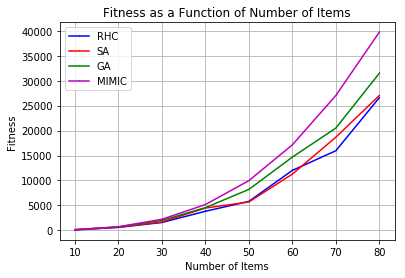

Producing graph...


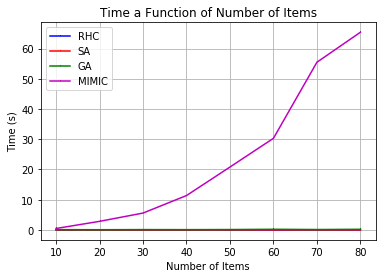

In [122]:
ns = list(range(10, 81, 10))



rhc_s = []
sa_s = []
ga_s = []
mmc_s = []

rhc_t = []
sa_t = []
ga_t = []
mmc_t = []

for n in ns:

    print('n:', n)
    weights = list(range(1, n + 1))
    values = [(v - n//2)**2 + 10 for v in list(range(1, n + 1))]

    fit_ks = mlrose.Knapsack(weights, values, 0.6)

    pq = mlrose.DiscreteOpt(length = len(weights),
    fitness_fn = fit_ks, maximize = True, max_val = 2)

    t0 = time()
    bs_rh, bf_rh = mlrose.random_hill_climb(pq,
        max_attempts=10, max_iters=1500)
    diff = time() - t0
    rhc_s.append(bf_rh)
    rhc_t.append(diff)

    t0 = time()
    bs_sa, bf_sa = mlrose.simulated_annealing(pq,
        schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001),
        max_attempts = 10, max_iters = 1000)
    diff = time() - t0
    sa_s.append(bf_sa)
    sa_t.append(diff)


    t0 = time()
    bs_ga, bf_ga = mlrose.genetic_alg(pq, mutation_prob=0.1,
        pop_size = 50, max_attempts = 10, max_iters = 1000)
    diff = time() - t0
    ga_s.append(bf_ga)
    ga_t.append(diff)

    t0 = time()
    bs_mm, bf_mm = mlrose.mimic(pq, pop_size=200, keep_pct=0.2,
        max_attempts=10, max_iters=inf)
    diff = time() - t0
    mmc_s.append(bf_mm)
    mmc_t.append(diff)

print(rhc_s)
print(sa_s)
print(ga_s)
print(mmc_s)

plot_xys([ns for i in range(4)],
            [rhc_s, sa_s, ga_s, mmc_s],
            ['RHC', 'SA', 'GA', 'MIMIC'],
            'Fitness as a Function of Number of Items',
            'Number of Items', 'Fitness')

plot_xys([ns for i in range(4)],
            [rhc_t, sa_t, ga_t, mmc_t],
            ['RHC', 'SA', 'GA', 'MIMIC'],
            'Time a Function of Number of Items',
            'Number of Items', 'Time (s)')

## Traveling Salesman

5
82.95117631205571
82.95117631205571
82.95117631205571
82.95117631205571
10
133.34602260715542
129.62539200595126
132.63876795773743
169.0258010902821
15
239.33727353266386
206.09862736797913
196.0248543519941
283.94130293411666
20
369.6024342318984
427.59606823488696
311.07738640479954
372.5872968954526
Producing graph...


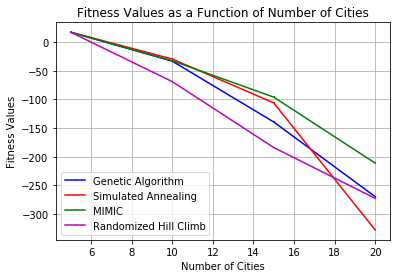

500
1000
1500
2000
2500
3000
3500
4000
Producing graph...


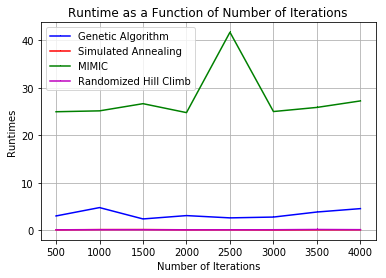

In [117]:
xlist = list(range(1,51,1))
ylist = list(range(1,51,1))
f1=[]
f2=[]
f3=[]
f4=[]
cities=[5,10,15,20]

###number of cities
for i in cities:
    newlist=[]
    for j in range(i):
        newlist.append((random.choice(xlist),random.choice(ylist)))

    fitness_coords = mlrose.TravellingSales(coords = newlist)
    problem_fit = mlrose.TSPOpt(length = i, fitness_fn = fitness_coords, maximize=False)
    print(str(i))
    a,b = mlrose.genetic_alg(problem_fit,max_iters=100)
    f1.append(100-b)
    print(b)
    c,d = mlrose.simulated_annealing(problem_fit,max_iters=100)
    f2.append(100-d)
    print(d)
    e,f =  mlrose.mimic(problem_fit,max_iters=100)
    f3.append(100-f)
    print(f)
    g,h = mlrose.random_hill_climb(problem_fit,max_iters=100)
    f4.append(100-h)
    print(h)

plot_xys([cities,cities,cities,cities], [f1,f2,f3,f4], ['Genetic Algorithm','Simulated Annealing','MIMIC','Randomized Hill Climb'],'Fitness Values as a Function of Number of Cities','Number of Cities', 'Fitness Values')


###time taken
newlist=[]
for i in range(50):
    newlist.append((random.choice(xlist),random.choice(ylist)))

fitness_coords = mlrose.TravellingSales(coords = newlist)
problem_fit = mlrose.TSPOpt(length = 50, fitness_fn = fitness_coords, maximize=False)

iterations=[500,1000,1500,2000,2500,3000,3500,4000]
time1=[]
time2=[]
time3=[]
time4=[]

for i in iterations:
    print(str(i))
    t=time()
    a,b = mlrose.genetic_alg(problem_fit,max_iters=i)
    t1=time()
    time1.append(t1-t)
    c,d = mlrose.simulated_annealing(problem_fit,max_iters=i)
    t2=time()
    time2.append(t2-t1)
    e,f =  mlrose.mimic(problem_fit,max_iters=i)
    t3=time()
    time3.append(t3-t2)
    g,h = mlrose.random_hill_climb(problem_fit,max_iters=i)
    t4=time()
    time4.append(t4-t3)

plot_xys([iterations,iterations,iterations,iterations], [time1,time2,time3,time4], ['Genetic Algorithm','Simulated Annealing','MIMIC','Randomized Hill Climb'],'Runtime as a Function of Number of Iterations','Number of Iterations', 'Runtimes')
